# Breast Cancer Classification with Tree Methods
## Introduction

In this practical session, we will explore and implement three powerful tree learning techniques: **Random Forest**, **AdaBoost**, and **CART** (Classification and Regression Trees). **Random Forest** and **AdaBoost** are ensemble learning method which mean it combine multiple models to improve predictive performance and robustness compared to individual models.

- **CART** (Classification and Regression Trees) is the foundation for both Random Forest and AdaBoost, creating binary decision trees based on features to make predictions.

- **Random Forest** is an ensemble method that builds multiple decision trees and merges their results, enhancing accuracy and reducing overfitting.
  
- **AdaBoost** (Adaptive Boosting) is a boosting technique that combines weak learners (typically decision trees) by giving more weight to misclassified instances, iteratively improving model performance.

In this session, we will apply these algorithms to classify breast cancer tumors based on their physical characteristics.

## Objective

- Gain an understanding of tree-based methods and their applications.
- Learn the concept and benefits of bagging (Bootstrap Aggregating) in ensemble learning.
- Explore the principles and advantages of boosting techniques for improving model performance.

## Dataset
We will use the Breast Cancer Wisconsin dataset, which contains 569 samples of breast cancer tumors with 30 features:
- Mean radius
- Mean texture
- Mean perimeter
- Mean area
- Mean smoothness
- ... (additional features)
- Target variable: Malignant (0) and Benign (1).



### 1. Data Preparation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

#### Load Dataset

In [ ]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target



#### Explore Data

In [ ]:
# Check missing value
print("There is missing value") if data.isnull().sum().sum() else print("There is no missing value!")
# Display the first few rows of the dataset
data.head()

There is no missing value!


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2. Data Visualization


#### Correlation matrix

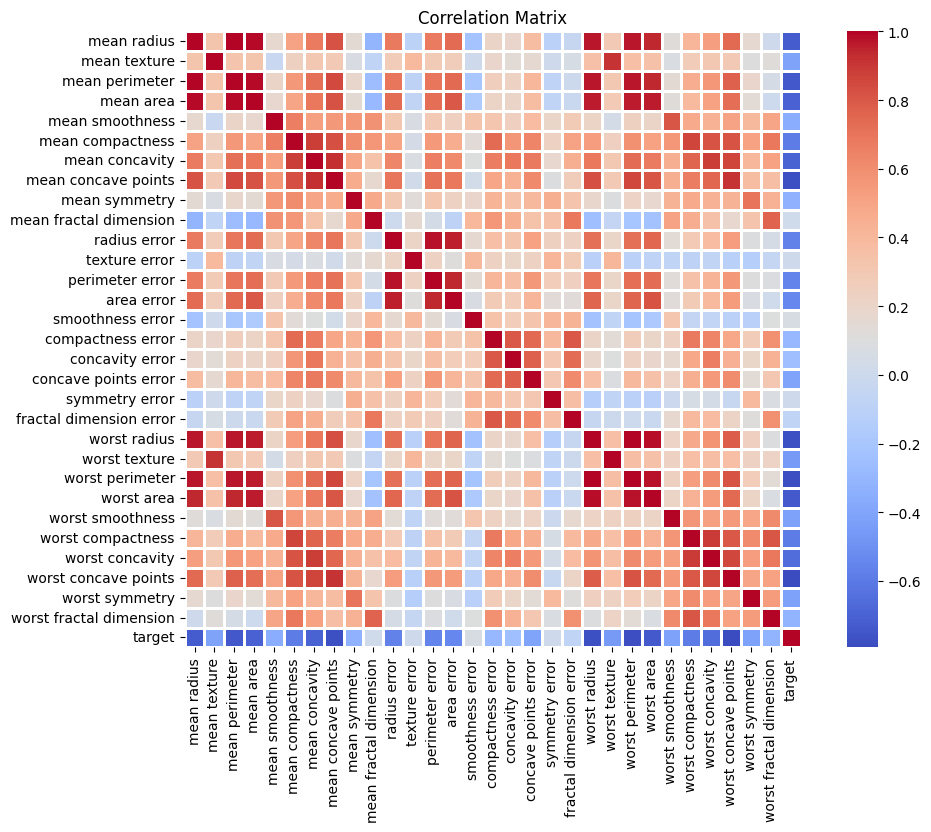

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr(method="pearson")

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.9)
plt.title("Correlation Matrix")
plt.show()

### 3. Data Splitting

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X = data.drop(['target'], axis=1)
y = data.target
columns_names=X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. CART Classification

The **CART (Classification and Regression Trees)** algorithm constructs decision trees by recursively splitting the data based on features that minimize the **Gini Index** for the child nodes. The Gini Index measures the level of impurity or diversity of values in a dataset column.

The Gini Index ranges from 0 to 1, where:

- A Gini Index of 0 indicates perfect purity (i.e., all elements in the node belong to a single class).
- A Gini Index of 1 indicates maximum impurity (i.e., the values are evenly distributed among all possible classes).

The formula for calculating the Gini Index for a given node is:

$$
Gini(n) = 1 - \sum_{i \in S} p_{i}^2
$$

Where:
- \( n \) is the node for which the Gini Index is being calculated.
- \( S \) is the set of distinct values (or categories) in the target variable **Y**.
- \( $p_{i}$ \) is the proportion of instances in node \( n \) that belong to value \( i \).


At each step, CART chooses the feature and split that result in the **lowest Gini Impurity** in child nodes, which means the data in the resulting subsets will be as pure (or homogeneous) as possible. The process continues recursively until a stopping criterion is met.



#### Train CART Model

In [ ]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Visualize Decision Tree

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(120, 80))
plot_tree(cart_model, filled=True, feature_names=columns_names, class_names=['Malignant', 'Benign'])
plt.show()

Thanks to the Gini Index, we can observe that at each node, malignant and benign tumors are increasingly well-separated.

#### Evaluate CART

A **confusion matrix** is a performance measurement tool used in classification problems to evaluate the accuracy of a model.
A confusion matrix typically consists of four key components:

1. **True Positive (TP)**: The number of instances where the model correctly predicted the positive class.
2. **True Negative (TN)**: The number of instances where the model correctly predicted the negative class.
3. **False Positive (FP)**: The number of instances where the model incorrectly predicted the positive class (Type I error).
4. **False Negative (FN)**: The number of instances where the model incorrectly predicted the negative class (Type II error).

The confusion matrix allows the calculation of several important metrics, such as:

- **Accuracy**:$\frac{TP + TN}{TP + TN + FP + FN}$ (measures the overall correctness of a classification model)
- **Precision**: $\frac{TP}{TP + FP}$  (the proportion of positive predictions that are actually correct)
- **Recall (Sensitivity)**:  $\frac{TP}{TP + FN}$  (the proportion of actual positive cases correctly identified)
- **F1 Score**: The harmonic mean of Precision and Recall,  $2 \times \frac{Precision \times Recall}{Precision + Recall}$





In [ ]:
# Predict and evaluate
y_pred_cart = cart_model.predict(X_test)
print("Confusion Matrix:\n","[[tn, fp]\n [fn, tp]]\n     =  \n", confusion_matrix(y_test, y_pred_cart))
print("CART Model Accuracy:", accuracy_score(y_test, y_pred_cart))

Confusion Matrix:
 [[tn, fp]
 [fn, tp]]
     =  
 [[40  3]
 [ 3 68]]
CART Model Accuracy: 0.9473684210526315


### 5. Random Forest

**Bagging** (Bootstrap Aggregating) is an ensemble learning technique that enhances model accuracy by combining the predictions of multiple base models. It generates several subsets of the training data through bootstrapping (random sampling with replacement) to introduce diversity among the model. A model is trained on each subset, and then the predictions are aggregated—typically by averaging for regression or voting for classification.

**Random Forest** is an ensemble method that constructs multiple decision trees (forming a "forest"), each trained on a bootstrapped subset of the data and a random subset of features. It aggregates the predictions of all the trees to produce a final estimates. This bagging technique helps reduce overfitting and improves accuracy by promoting diversity among the trees.

#### Comparison with CART:
- **CART** builds a single decision tree using recursive splits of the data, often guided by metrics like Gini Impurity. However, CART can overfit if the tree becomes too complex.
-**Random Forest** improves upon CART by reducing overfitting and enhancing robustness through its bagging approach.




#### Train Random Forest Model

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluate Random Forest Model

In [ ]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Confusion Matrix:\n","[[tn, fp]\n [fn, tp]]\n     =  \n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))


Confusion Matrix:
 [[tn, fp]
 [fn, tp]]
     =  
 [[40  3]
 [ 1 70]]
Random Forest Model Accuracy: 0.9649122807017544


### 6. Boosting with AdaBoost
**Boosting** is an ensemble learning technique that combines the predictions of multiple weak learners (models that perform slightly better than random guessing) to create a strong, more accurate predictive model. The core idea behind boosting is to train a series of models, where each new model focuses on correcting the errors made by the previous ones.

**AdaBoost** (Adaptive Boosting) is a boosting algorithm that builds a strong classifier by combining multiple weak learners, typically decision trees with a single split, known as "stumps." The algorithm works by iteratively training these weak learners, where each new model focuses more on the samples misclassified by the previous ones. In each iteration, AdaBoost increases the probability of selecting misclassified samples, thereby giving them greater influence in the training of the next model. This iterative process allows AdaBoost to adjust the model's focus to the harder-to-classify instances. The final prediction is made by combining the weighted predictions from all the models, with more accurate models contributing more to the final decision.

#### Train Boosting Model

In [ ]:
# Train the AdaBoost model
boost_model = AdaBoostClassifier(n_estimators=50,learning_rate=1.0, random_state=42)
boost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

#### Evaluate Boosting Model



In [ ]:
# Predict and evaluate
y_pred_boost = boost_model.predict(X_test)
print("Confusion Matrix:\n","[[tn, fp]\n [fn, tp]]\n     =  \n", confusion_matrix(y_test, y_pred_boost))
print("Boosting Model Accuracy:", accuracy_score(y_test, y_pred_boost))


Confusion Matrix:
 [[tn, fp]
 [fn, tp]]
     =  
 [[40  3]
 [ 1 70]]
Boosting Model Accuracy: 0.9649122807017544


### 7. Summary of Results


In [ ]:
# Summary of the results
results = {
    'Model': ['CART', 'Random Forest', 'Boosting'],
    'Accuracy': [accuracy_score(y_test, y_pred_cart), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_boost)]
}

results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy
0           CART  0.947368
1  Random Forest  0.964912
2       Boosting  0.964912


### Conclusion
In this practical session, we successfully classified breast cancer tumors as either Malignant or Benign using three techniques: CART, Random Forest, and Boosting (AdaBoost). AdaBoost appears to outperform other models on this dataset, although cross-validation is needed to formally confirm this for the current data.

While ensemble methods are generally seen as offering superior performance, they tend to be more sensitive to hyperparameter tuning.
Exploring hyperparameter tuning could significantly enhance predictive performance and yield even better results.

### Ideas for Hyperparameter Tuning
- **CART (Classification and Regression Trees)**:
  - `max_depth`: Control the maximum depth of the tree to mitigate overfitting.
  - `min_samples_split`: Set the minimum number of samples needed to split an internal node.
  - `min_samples_leaf`: Define the minimum number of samples required to be present at a leaf node.

- **Random Forest**:
  - `max_depth`: Control the maximum depth of the tree to mitigate overfitting.
  - `min_samples_split`: Set the minimum number of samples needed to split an internal node.
  - `min_samples_leaf`: Define the minimum number of samples required to be present at a leaf node.
  - `n_estimators`: Determine the number of trees in the ensemble; increasing this can enhance performance but also raise computation costs.
  - `max_features`: Specify the number of features to consider when finding the best split.

- **Boosting (AdaBoost)**:
  - `n_estimators`: Set the number of weak learners to utilize; while more can improve accuracy, it may also lead to overfitting.
  - `learning_rate`: Adjust the weight of each classifier's contribution; a lower value may improve results but can increase training time.
  - `estimator`: Experiment with various base estimators, such as decision trees with different depths.



### Bonus: What is Feature Importance?

**Feature importance** quantifies the contribution of each feature to a model's predictions. It helps identify which features have the greatest influence on the model's output.

### How is it Computed?

One common method is **permutation importance**, where the values of a feature are randomly shuffled, and the impact on the model's accuracy is measured. A **larger decrease in accuracy** indicates that the feature is more important to the model.


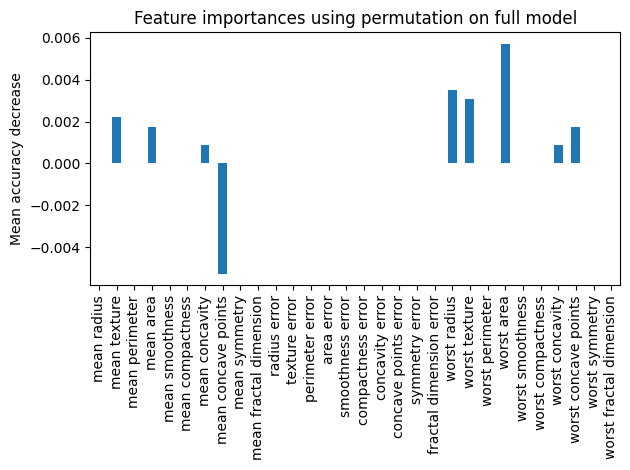

In [ ]:
result = permutation_importance(
    rf_model, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=cancer.feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Feature Importance Summary

- **Key features** like **worst area**, **worst radius**, and **worst texture** are crucial for the model, as shuffling them reduces accuracy.
- **mean concave points** have **negative importance**, meaning they might introduce noise or redundancy, and could be considered for removal.
- Some features have **near-zero importance**, suggesting they don't significantly impact model performance.

### Handling Features with Negative Permutation Importance

Features with **negative permutation importance** indicate that shuffling them **improves the model's performance**, suggesting they may introduce **noise**, **irrelevant information**, or cause **overfitting**.

Such features should be **reviewed carefully** and are often good candidates for **removal** to improve model accuracy and reduce complexity. However, it's important to validate the impact by testing model performance after their removal.

### Conclusion
**Worst area** appears to be the most significant feature in predicting whether a tumor is **malignant** or **benign**.
